In [1]:
import numpy as np
import geopandas
import matplotlib
import pandas as pd
import json
import contextily
import matplotlib.pyplot as plt
import geoplot
import seaborn as sns
import datetime
import csv

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from shapely.geometry import Polygon, Point

### Data inspection & cleaning

In [2]:
#for desktop
df = pd.read_csv(r'C:\Users\Ray\Desktop\TweetsAmsterdamWithLanguage.csv', encoding = 'latin1', sep = ',')

C:\Users\Ray\Anaconda3\envs\python36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#for laptop
#df = pd.read_csv(r'C:\Users\raymo\Downloads\AmsterdamWithLanguage.csv', encoding = 'latin1', sep = ',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570981 entries, 0 to 3570980
Data columns (total 16 columns):
created_at     object
id             int64
id_str         int64
user_id        int64
user_id_str    int64
user_name      object
tweet_text     object
language       object
place          object
longitude      float64
latitude       float64
sqrt_area      float64
type           object
url            object
media_url      object
time_stamp     int64
dtypes: float64(3), int64(5), object(8)
memory usage: 435.9+ MB


In [5]:
df.head(3)

,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,latitude,sqrt_area,type,url,media_url,time_stamp
0,Thu Sep 01 00:00:16 +0000 2011,109052916551262208,109052916551262208,272419626,272419626,SoundLoop,"#ReMix answer: untitled song, @azhmyfauzi 13/1...",NaN,"Amsterdam, North Holland",4.882822,52.362261,0.0,NaN,NaN,NaN,1314835216
1,Thu Sep 01 00:00:38 +0000 2011,109053009698361344,109053009698361344,272419626,272419626,SoundLoop,#ReMix [rehaocl & rkco tuo] various - 22 brass...,NaN,"Amsterdam, North Holland",4.882822,52.362261,0.0,NaN,NaN,NaN,1314835238
2,Thu Sep 01 00:08:19 +0000 2011,109054945529044992,109054945529044992,22217386,22217386,Freeda (Henk Veen),RT @henkveen nu naar bedje 6 uur op voor #inte...,NaN,"Amsterdam, North Holland",4.929879,52.365195,0.0,NaN,NaN,NaN,1314835699


In [6]:
df.tail(3)

,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,latitude,sqrt_area,type,url,media_url,time_stamp
3570978,Wed Apr 10 23:55:33 +0000 2019,1116127609643864065,1116127609643864065,45151855,45151855,Xiaui Macagba,"One of the canals of Amsterdam @ Amsterdam, Ne...",en,"Amsterdam, The Netherlands",4.900100,52.377700,0.0,NaN,NaN,NaN,1554940533
3570979,Thu Apr 11 00:17:22 +0000 2019,1116133098515832833,1116133098515832833,249596574,249596574,Diego A. GutiÃ©rrez,#Amsterdam Centraal ð³ð±ð en Amsterdam ...,nl,"Amsterdam, Holanda",4.898788,52.376974,0.0,NaN,NaN,NaN,1554941842
3570980,Thu Apr 11 00:18:25 +0000 2019,1116133365319643138,1116133365319643138,22509578,22509578,Chimera âª Ã¸ lll Â·o,"Rijksmuseum, Amsterdam â¤ï¸\n.\n.\n.\n#later...",nl,"Amsterdam, Nederland",4.885380,52.359950,0.0,NaN,NaN,NaN,1554941905


### Remove bots from dataset

In [7]:
df['user_id'].value_counts()

272419626             321157
186899860              74308
550261599              43427
87496277               41275
291158798              30220
19140633               16757
1020496418             14903
15619253               14268
124576255              11627
59093441               11339
278708054              11005
1568451847             10595
3375579785              9925
270963788               8597
15536268                7832
208056970               7798
490558355               7654
601196289               7208
88039815                7024
999538596               7008
863162563               6861
168489388               6721
135668330               6308
39748554                6216
17519493                6074
34236869                5754
2596544793              5649
2119871                 5644
191092262               5528
330326882               5479
                       ...  
41100622                   1
355176687                  1
183682418                  1
485848452     

In [8]:
df[df.user_name == 'Sol Tempore'].head()

,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,latitude,sqrt_area,type,url,media_url,time_stamp
70,Thu Sep 01 04:12:01 +0000 2011,109116272142331904,109116272142331904,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,"Amsterdam, North Holland",4.9,52.3667,0.0,NaN,NaN,NaN,1314850321
1656,Fri Sep 02 04:14:00 +0000 2011,109479161298554880,109479161298554880,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1314936840
3056,Sat Sep 03 04:15:01 +0000 2011,109841803154427904,109841803154427904,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315023301
4534,Sun Sep 04 04:17:01 +0000 2011,110204694885957633,110204694885957633,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315109821
7034,Tue Sep 06 04:21:01 +0000 2011,110930475605954560,110930475605954560,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315282861


In [9]:
### Manually inspect user ids for bots
df[df.user_id ==215292728].head(10)


,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,latitude,sqrt_area,type,url,media_url,time_stamp
70,Thu Sep 01 04:12:01 +0000 2011,109116272142331904,109116272142331904,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,"Amsterdam, North Holland",4.9,52.3667,0.0,NaN,NaN,NaN,1314850321
1656,Fri Sep 02 04:14:00 +0000 2011,109479161298554880,109479161298554880,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1314936840
3056,Sat Sep 03 04:15:01 +0000 2011,109841803154427904,109841803154427904,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315023301
4534,Sun Sep 04 04:17:01 +0000 2011,110204694885957633,110204694885957633,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315109821
7034,Tue Sep 06 04:21:01 +0000 2011,110930475605954560,110930475605954560,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315282861
8390,Wed Sep 07 04:22:00 +0000 2011,111293114823622656,111293114823622656,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315369320
9866,Thu Sep 08 04:24:01 +0000 2011,111656007641477120,111656007641477120,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315455841
11483,Fri Sep 09 04:26:00 +0000 2011,112018896889978880,112018896889978880,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315542360
13165,Sat Sep 10 04:28:01 +0000 2011,112381791029039104,112381791029039104,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315628881
14795,Sun Sep 11 04:29:00 +0000 2011,112744428032114688,112744428032114688,215292728,215292728,Sol Tempore,"Good morning, Amsterdam, Netherlands! Dawn 06:...",NaN,Amsterdam,4.9,52.3667,0.0,NaN,NaN,NaN,1315715340


In [10]:
#delete user_ids which are bots
df = df[(df.user_id !=272419626) & (df.user_id !=186899860) & (df.user_id !=550261599) & (df.user_id !=291158798) 
        &(df.user_id !=19140633) &(df.user_id !=278708054) &(df.user_id !=3375579785) &(df.user_id !=208056970) & 
        (df.user_id !=88039815) & (df.user_id !=168489388 ) & (df.user_id !=191092262) & (df.user_id !=215292728)]


In [11]:
df.count()

created_at     3034715
id             3034715
id_str         3034715
user_id        3034715
user_id_str    3034715
user_name      3031986
tweet_text     3034715
language       2394946
place          3030610
longitude      3034715
latitude       3034715
sqrt_area      3034715
type            281481
url             281481
media_url       281481
time_stamp     3034715
dtype: int64

### Drop duplicate ID's

In [12]:
df['id'].value_counts()

524624155334148096     3
304686731834302464     2
375492984563064832     2
489550634279239680     2
502951512159817728     2
247075834039513088     2
379216576463261696     2
503971324638027777     2
338658582327349248     2
419761488212275200     2
1098134281807847424    2
415810501147639808     2
358412371775062017     2
368110441253187584     2
420265099832877056     2
351621266559602689     2
370643824147959808     2
502875244810743808     2
1099325561829126145    2
555876859112456192     2
384917490167742464     2
389132768103649280     2
311500878672711680     2
342716775529594880     2
329166744075763712     2
352529091179724800     2
423507497627164672     2
352452187693133824     2
379650934223421440     2
385314350346412032     2
                      ..
494163181485690880     1
559732638102323205     1
274844701847343105     1
952719620854747137     1
310820715463065600     1
706430185512542208     1
451664014402400256     1
415529700640178176     1
568148855298109440     1


In [13]:
df = df.drop_duplicates(subset='id', keep="first")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034020 entries, 2 to 3570980
Data columns (total 16 columns):
created_at     object
id             int64
id_str         int64
user_id        int64
user_id_str    int64
user_name      object
tweet_text     object
language       object
place          object
longitude      float64
latitude       float64
sqrt_area      float64
type           object
url            object
media_url      object
time_stamp     int64
dtypes: float64(3), int64(5), object(8)
memory usage: 393.5+ MB


### Data transformation and descriptive statistics

In [15]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

In [16]:
### transform from GMT to UTC by adding one hour
df['created_at'] = df['created_at'] + datetime.timedelta(hours=1)

In [17]:
#remove 2011 and 2019 from dataframe
start_date = '01-01-2012'
end_date = '01-01-2019'
mask = (df['created_at'] >= start_date) & (df['created_at'] < end_date)
df = df.loc[mask]

In [18]:
df.tail()

,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,latitude,sqrt_area,type,url,media_url,time_stamp
3521360,2018-12-31 23:55:43,1079888863982608387,1079888863982608387,264066520,264066520,Nouri Aziz,Happy new year westertoren Happy new year Amst...,en,"Amsterdam, The Netherlands",4.880164,52.374023,0.000000,NaN,NaN,NaN,1546300543
3521361,2018-12-31 23:55:56,1079888920257724421,1079888920257724421,22054528,22054528,Vera Siemons,@simsonliu Dankjewel!,nl,"Oostelijke Eilanden/Kadijken, Amsterdam",4.921446,52.370234,0.017368,NaN,NaN,NaN,1546300556
3521362,2018-12-31 23:55:51,1079888898808000512,1079888898808000512,22054528,22054528,Vera Siemons,@diamondbacknl Dankje!,nl,"Oostelijke Eilanden/Kadijken, Amsterdam",4.921446,52.370234,0.017368,NaN,NaN,NaN,1546300551
3521363,2018-12-31 23:56:08,1079888969003925504,1079888969003925504,22054528,22054528,Vera Siemons,@luuk ð¥°,und,"Oostelijke Eilanden/Kadijken, Amsterdam",4.921446,52.370234,0.017368,NaN,NaN,NaN,1546300568
3521364,2018-12-31 23:59:42,1079889867646124032,1079889867646124032,463305656,463305656,Martin,Happy New Year Everyone !!! ðð¾â¨ðð...,en,"Amsterdam, The Netherlands",4.900100,52.377700,0.000000,NaN,NaN,NaN,1546300782


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853829 entries, 189990 to 3521364
Data columns (total 16 columns):
created_at     datetime64[ns]
id             int64
id_str         int64
user_id        int64
user_id_str    int64
user_name      object
tweet_text     object
language       object
place          object
longitude      float64
latitude       float64
sqrt_area      float64
type           object
url            object
media_url      object
time_stamp     int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(7)
memory usage: 370.1+ MB


In [20]:
def get_day_of_week(day):
    weekdays = {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    }
    return weekdays[day]

def get_season(month):
    months = {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter',
    }
    
    return months[month]

df['Year'] = df.created_at.dt.year
df['Month'] = df.created_at.dt.month
df['Day'] = df.created_at.dt.day
df['Hour'] = df.created_at.dt.hour
df['DayOfWeek_nr'] = df.created_at.dt.dayofweek
df['DayOfWeek'] = df.created_at.dt.dayofweek.apply(lambda x: get_day_of_week(x))
df['YearMonth'] = pd.to_datetime(df['created_at']).dt.to_period('M')
df['Season'] = df.Month.apply(get_season)

In [21]:
#start_date = '09-01-2013'
#end_date = '09-08-2013'
#mask = (df['created_at'] > start_date) & (df['created_at'] <= end_date)
#df2 = df.loc[mask]
#df2.id = df.id.astype(str)
#df2.id_str = df.id_str.astype(str)
#df2.to_csv(r'C:\Users\raymo\Downloads\AmsterdamSeptember2013-09-01.csv', index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)
#df2.info()


C:\Users\Ray\Anaconda3\envs\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


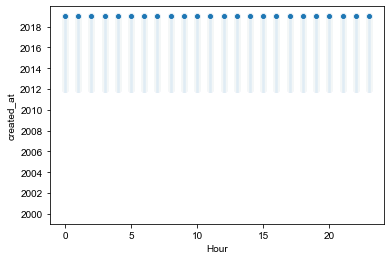

In [22]:
#only to set style for matplotlib plots
sns.scatterplot(x='Hour',y='created_at',data=df)
sns.set(style="darkgrid")
#plt.show()

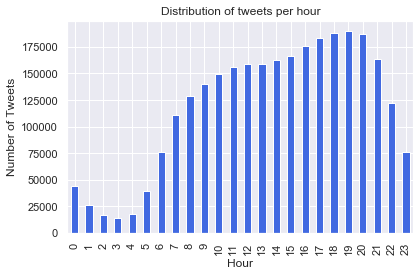

In [23]:
df.groupby('Hour').agg({'id':'count'}).rename(columns={'id':'Tweets per hour'}).plot(title = 'Distribution of tweets per hour', kind = 'bar', color = 'royalblue', legend = None)
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.savefig('Distribution of tweets per hour')
plt.show()


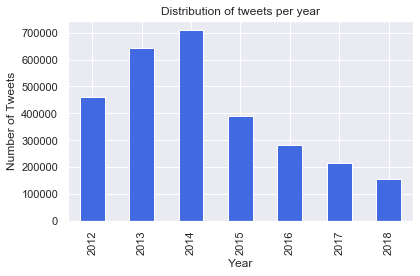

In [24]:
df.groupby('Year').agg({'id':'count'}).rename(columns={'id':'Tweets per year'}).plot(title = 'Distribution of tweets per year', kind = 'bar', color = 'royalblue', legend = None)
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.savefig('Distribution of tweets per year')
plt.show()

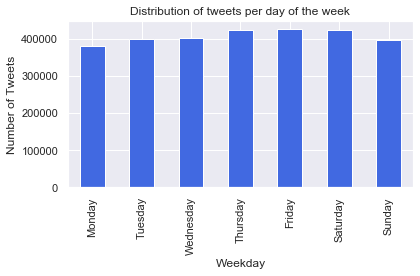

In [25]:
ax = df.groupby('DayOfWeek_nr').agg({'id':'count'}).plot(title = 'Distribution of tweets per day of the week', kind = 'bar', color = 'royalblue', legend = None)
plt.xlabel('Weekday')
plt.ylabel('Number of Tweets')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.tight_layout()
plt.savefig('Distribution of tweets per day of the week')
plt.show()

In [26]:
df['DayOfWeek'].value_counts()

Friday       427031
Thursday     423856
Saturday     423518
Wednesday    402706
Tuesday      398155
Sunday       397820
Monday       380743
Name: DayOfWeek, dtype: int64

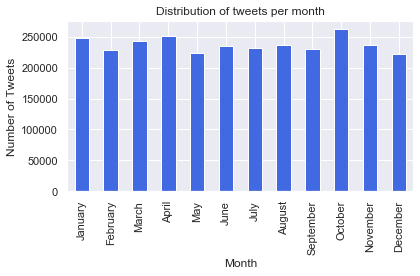

In [27]:
ax = df.groupby('Month').agg({'id':'count'}).plot(title = 'Distribution of tweets per month', kind = 'bar', color = 'royalblue', legend = None)
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
ax.set_xticklabels(['January','February','March','April','May','June','July', 'August', 'September', 'October', 'November', 'December'])
plt.tight_layout()
plt.savefig('Distribution of tweets per month')
plt.show()

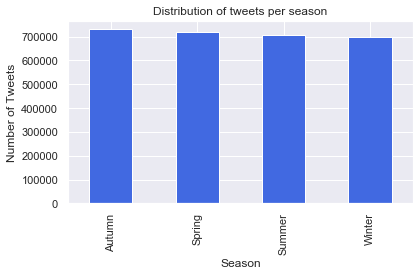

In [28]:
ax = df.groupby('Season').agg({'id':'count'}).plot(title = 'Distribution of tweets per season', kind = 'bar', color = 'royalblue', legend = None)
plt.xlabel('Season')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.savefig('Distribution of tweets per Season')
plt.show()

### Distinguish tourists from residents

In [29]:
user_date_ranges_df = df.groupby('user_id').agg({
    'created_at': ['min','max'],
    'tweet_text': ['count']
}).reset_index()

# time difference from first tweet to last tweet
user_date_ranges_df['diff'] = user_date_ranges_df['created_at']['max'] - user_date_ranges_df['created_at']['min']

user_date_ranges_df.columns = ['user_id','min','max','count','diff']
user_date_ranges_df = user_date_ranges_df.drop(columns=['min','max'])

# average number of tweets per day
user_date_ranges_df['freq'] = user_date_ranges_df['count'] / (user_date_ranges_df['diff'].dt.days)
user_date_ranges_df['freq'].replace(np.inf, 0, inplace=True)

In [30]:
df_merged = df.merge(user_date_ranges_df, how='left', on='user_id')

In [31]:
df_merged.sample(5)

,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,...,Month,Day,Hour,DayOfWeek_nr,DayOfWeek,YearMonth,Season,count,diff,freq
2424423,2016-10-16 13:17:59,787643753741901824,787643753741901824,241078357,241078357,samjoystudio,semoga mak aji belando nyampe indonesia dengan...,in,"Amsterdam, The Netherlands",4.892200,...,10,16,13,6,Sunday,2016-10,Autumn,5,857 days 00:26:28,0.005834
1299880,2014-04-17 14:56:14,456808357119414272,456808357119414272,720668760,720668760,YMCTRACHSEL,#forgettheworld #poeth @ Amsterdam http://t.co...,en,"Amsterdam, Noord-Holland",4.886833,...,4,17,14,3,Thursday,2014-04,Spring,2,362 days 18:35:26,0.005525
2568534,2017-05-14 08:30:16,863672802272051200,863672802272051200,627315657,627315657,StylishLondonLiving,Yesterday was spent taking in culture and hist...,en,"Amsterdam, The Netherlands",4.892200,...,5,14,8,6,Sunday,2017-05,Spring,5,2 days 03:07:03,2.500000
792766,2013-07-14 10:33:32,356360807434567680,356360807434567680,150253982,150253982,Polar,Home guard! @ Sanders bedje http://t.co/iQaLcx...,nl,"Amsterdam, North Holland",4.848667,...,7,14,10,6,Sunday,2013-07,Summer,1274,625 days 04:04:29,2.038400
242010,2012-08-14 08:47:16,235296519555776512,235296519555776512,45411813,45411813,Femi Meaux,Weekend fun @avabisou @ Roest http://t.co/2o...,NaN,Amsterdam,4.926390,...,8,14,8,1,Tuesday,2012-08,Summer,489,1170 days 22:11:00,0.417949


In [32]:
df_merged['is_tourist'] = (df_merged['diff'] < pd.Timedelta('14 days'))

In [33]:
df_tourist = df_merged[df_merged.is_tourist == True]
df_not_tourist = df_merged[df_merged.is_tourist == False]

In [34]:
df_tourist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589831 entries, 23 to 2853828
Data columns (total 28 columns):
created_at      589831 non-null datetime64[ns]
id              589831 non-null int64
id_str          589831 non-null int64
user_id         589831 non-null int64
user_id_str     589831 non-null int64
user_name       589601 non-null object
tweet_text      589831 non-null object
language        507486 non-null object
place           587102 non-null object
longitude       589831 non-null float64
latitude        589831 non-null float64
sqrt_area       589831 non-null float64
type            65681 non-null object
url             65681 non-null object
media_url       65681 non-null object
time_stamp      589831 non-null int64
Year            589831 non-null int64
Month           589831 non-null int64
Day             589831 non-null int64
Hour            589831 non-null int64
DayOfWeek_nr    589831 non-null int64
DayOfWeek       589831 non-null object
YearMonth       589831 non-null

In [75]:
# Also create dataset with ENG only for sentiment analysis
df_tourist_en = df_tourist[df_tourist.language == 'en']

In [37]:
df_tourist_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256549 entries, 401724 to 2853828
Data columns (total 28 columns):
created_at      256549 non-null datetime64[ns]
id              256549 non-null int64
id_str          256549 non-null int64
user_id         256549 non-null int64
user_id_str     256549 non-null int64
user_name       256428 non-null object
tweet_text      256549 non-null object
language        256549 non-null object
place           255828 non-null object
longitude       256549 non-null float64
latitude        256549 non-null float64
sqrt_area       256549 non-null float64
type            27952 non-null object
url             27952 non-null object
media_url       27952 non-null object
time_stamp      256549 non-null int64
Year            256549 non-null int64
Month           256549 non-null int64
Day             256549 non-null int64
Hour            256549 non-null int64
DayOfWeek_nr    256549 non-null int64
DayOfWeek       256549 non-null object
YearMonth       256549 non-

### Sentiment Analysis

In [38]:
%%capture
analyser = SentimentIntensityAnalyzer()
df_tourist_en['neg'], df_tourist_en['neu'], df_tourist_en['pos'], df_tourist_en['compound'] = zip(
    *df_tourist_en['tweet_text'].apply(
        lambda x: list(analyser.polarity_scores(x).values())
    )
)

In [39]:
def get_sentiment_label(compound):
    if(compound >= 0.05):
        return 'pos'
    elif(compound <= -0.05):
        return 'neg'
    else:
        return 'neu'

df_tourist_en['polarity'] = df_tourist_en['compound'].apply(lambda x: get_sentiment_label(x))

C:\Users\Ray\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
df_tourist_en.polarity.value_counts()

neu    138336
pos     93129
neg     25084
Name: polarity, dtype: int64

In [41]:
df_tourist_en['polarity'].astype(str)

401724     neu
401818     neg
403338     neu
403441     pos
404101     neu
404882     pos
405357     neu
405359     pos
423636     pos
424101     neu
424169     neu
424531     neu
424781     neu
424792     neg
424914     pos
424948     pos
425046     neu
425074     pos
425121     pos
425154     pos
425161     neg
425170     neu
425213     neu
425253     pos
425431     pos
425453     neu
425462     neu
425551     neu
425651     neu
425662     neu
          ... 
2853692    pos
2853704    neu
2853706    neu
2853708    neu
2853714    pos
2853716    neu
2853726    pos
2853730    neu
2853733    pos
2853736    pos
2853742    pos
2853745    neu
2853746    neg
2853748    pos
2853751    neu
2853752    neu
2853761    pos
2853764    neg
2853769    pos
2853783    pos
2853786    neu
2853788    neu
2853792    pos
2853796    pos
2853804    neu
2853805    neu
2853813    pos
2853815    neu
2853820    pos
2853828    pos
Name: polarity, Length: 256549, dtype: object

In [42]:
df_tourist_en['compound'].value_counts()

 0.0000    137041
 0.6369      4434
 0.4404      3860
 0.3612      3140
 0.4588      2720
 0.4215      2605
 0.5719      2327
 0.5859      2234
 0.3182      2214
 0.4019      2198
 0.5994      2152
 0.4939      1858
 0.6249      1843
-0.2960      1839
 0.5106      1363
 0.5267      1330
-0.1027      1312
 0.4926      1028
 0.0772      1015
 0.2023       980
 0.2732       979
 0.3400       955
 0.4767       932
 0.3818       894
 0.2263       858
-0.1531       853
 0.6696       832
 0.2960       816
 0.5574       781
 0.2500       715
            ...  
 0.0591         1
 0.5872         1
-0.3584         1
-0.4903         1
-0.0093         1
 0.9242         1
 0.4318         1
-0.6154         1
 0.7305         1
 0.0936         1
 0.4401         1
-0.7002         1
-0.4082         1
-0.0800         1
 0.8328         1
 0.5044         1
-0.9166         1
 0.6067         1
-0.8188         1
-0.3822         1
-0.3464         1
 0.6371         1
-0.2354         1
 0.9492         1
-0.0021   

In [79]:
#exclude neutral 
df_tourist_en = df_tourist_en.loc[df_tourist_en['polarity'] != 'neu']

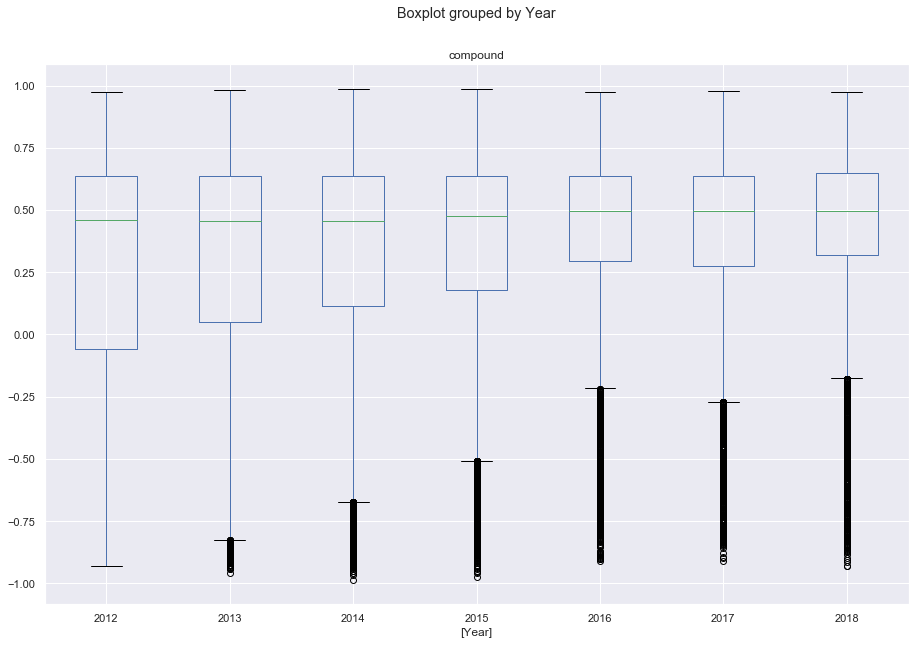

In [80]:
df_tourist_en.boxplot(column=['compound'], by=['Year'], figsize=(15,10))

### Geospatial analysis

In [46]:
df_tourist['type'].fillna(0, inplace=True)
gdf = geopandas.GeoDataFrame(
    df_tourist, geometry=geopandas.points_from_xy(df_tourist.longitude, df_tourist.latitude))

C:\Users\Ray\Anaconda3\envs\python36\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [47]:
gdf.sample(5)

,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,...,Hour,DayOfWeek_nr,DayOfWeek,YearMonth,Season,count,diff,freq,is_tourist,geometry
1714211,2014-11-04 10:11:00,529576536576647168,529576536576647168,55189729,55189729,david huskisson,Love this dashboard slide on measuring value o...,en,"Amsterdam, North Holland",4.895050,...,10,1,Tuesday,2014-11,Autumn,8,1 days 15:38:19,8.000000,True,POINT (4.89505 52.37277)
1843319,2015-01-20 13:48:36,557535164767535105,557535164767535105,215040726,215040726,Tim Felius,Eventjes een happie eten! @ Jumbo Foodmarkt ht...,nl,"Amsterdam, Noord-Holland",4.920126,...,13,1,Tuesday,2015-01,Winter,1,0 days 00:00:00,0.000000,True,POINT (4.92013 52.38319)
2478850,2016-12-27 18:21:52,813812156269522946,813812156269522946,179936807,179936807,Fabrizio,ð®#cowmuseum #Amsterdam #Amsterdamworld #Ams...,und,"Amsterdam, Nederland",4.887549,...,18,1,Tuesday,2016-12,Winter,39,9 days 04:28:16,4.333333,True,POINT (4.88755 52.37509)
2012781,2015-05-04 21:06:56,595333814236360705,595333814236360705,19198499,19198499,Emily Pykett,Three different bergamot liqueurs #heaven @ ca...,en,"Amsterdam, North Holland",4.906528,...,21,0,Monday,2015-05,Spring,3,0 days 23:12:12,0.000000,True,POINT (4.90653 52.35744)
1007909,2013-11-11 11:15:48,399857991442530304,399857991442530304,239885144,239885144,Tom Holland,'Koningsdochter' is a much better word than 'p...,nl,"Amsterdam, North Holland",4.886098,...,11,0,Monday,2013-11,Autumn,17,0 days 20:43:15,0.000000,True,POINT (4.88610 52.35996)


In [48]:
gdf['type'].head(5)

23        0
32    photo
35        0
38        0
40        0
Name: type, dtype: object

In [49]:
gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)

In [50]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 589831 entries, 23 to 2853828
Data columns (total 29 columns):
created_at      589831 non-null datetime64[ns]
id              589831 non-null int64
id_str          589831 non-null int64
user_id         589831 non-null int64
user_id_str     589831 non-null int64
user_name       589601 non-null object
tweet_text      589831 non-null object
language        507486 non-null object
place           587102 non-null object
longitude       589831 non-null float64
latitude        589831 non-null float64
sqrt_area       589831 non-null float64
type            589831 non-null object
url             65681 non-null object
media_url       65681 non-null object
time_stamp      589831 non-null int64
Year            589831 non-null int64
Month           589831 non-null int64
Day             589831 non-null int64
Hour            589831 non-null int64
DayOfWeek_nr    589831 non-null int64
DayOfWeek       589831 non-null object
YearMonth       589831

In [51]:
%%capture
# %%capture ignores warnings
gdf['Longitude'] = gdf.geometry.apply(lambda pnt: pnt.x)
gdf['Latitude'] = gdf.geometry.apply(lambda pnt: pnt.y)

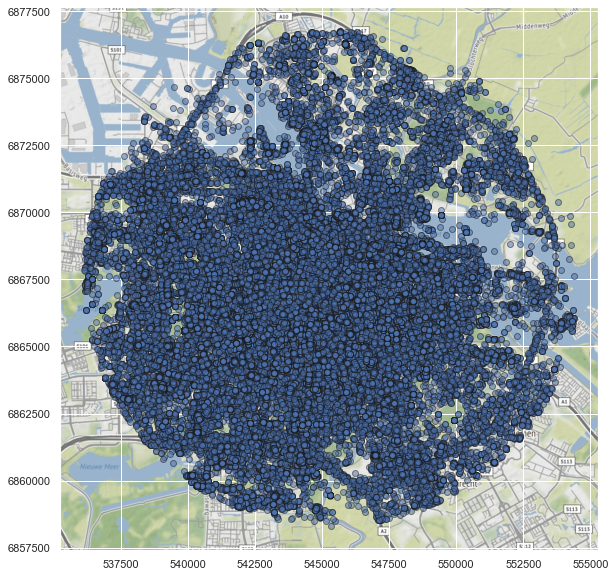

In [52]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
contextily.add_basemap(ax, url=contextily.sources.ST_TERRAIN)

In [53]:
def plot_map(data):
    """ Takes a GeoPandas.DataFrame as input """
    fig, ax = plt.subplots(1,1,figsize=(10,10))

    n_levels = 1000
    alpha_level = 0.5

    sns.kdeplot(
        data.Longitude, 
        data.Latitude,
        bw = 'scott',
        shade=True, 
        cmap='jet',
        kernel='gau',
        n_levels=n_levels,
        ax = ax,
        alpha=alpha_level,
        legend = True,
        shade_lowest = True
        #gridsize = 200
    )

    for i in range(len(ax.collections)-10):
        ax.collections[i].set_alpha(min(i/n_levels, alpha_level))

    contextily.add_basemap(ax, url=contextily.sources.ST_TERRAIN)
    
    #ax.set_ylim(6863000, 6869500)
    #ax.set_xlim(541000, 547500)

    #plt.axis('off')
    return ax

### Draw plot by selecting year (no arguments means all)

In [54]:
gdf[gdf.created_at.dt.year == 2018].latitude.value_counts()

52.377700    13846
52.373100     3899
52.359950      800
52.376974      532
52.341213      512
52.372510      499
52.377465      391
52.341377      374
52.358410      312
52.358730      310
52.373136      304
52.378782      288
52.357910      270
52.384210      258
52.374021      249
52.375067      207
52.378612      195
52.374133      185
52.357870      175
52.373028      175
52.358134      163
52.359877      155
52.360760      149
52.357930      146
52.359047      144
52.358879      138
52.355257      137
52.373503      136
52.341230      135
52.357932      135
             ...  
52.364377        1
52.360548        1
52.358155        1
52.368200        1
52.349959        1
52.370011        1
52.357921        1
52.390352        1
52.363429        1
52.372770        1
52.388763        1
52.357977        1
52.367078        1
52.366640        1
52.371521        1
52.368899        1
52.358458        1
52.381466        1
52.401022        1
52.378733        1
52.379168        1
52.366022   

In [55]:
gdf[gdf.created_at.dt.year == 2018].longitude.value_counts()

4.900100    13846
4.892200     3849
4.885380      798
4.898788      532
4.889233      512
4.876810      499
4.902968      391
4.889093      374
4.881152      312
4.881970      311
4.892907      305
4.900374      288
4.902880      259
4.896169      249
4.896185      207
4.900546      196
4.896839      185
4.891500      175
4.893060      175
4.880977      163
4.879850      157
4.885161      155
4.887030      147
4.881320      146
4.883614      144
4.870744      138
4.898014      137
4.876448      137
4.889910      135
4.891315      135
            ...  
4.899218        1
4.913632        1
4.921961        1
4.900992        1
4.841097        1
4.886564        1
4.876324        1
4.844062        1
4.902388        1
4.935680        1
4.894825        1
4.907455        1
4.905074        1
4.894033        1
4.929600        1
4.915216        1
4.894824        1
4.893166        1
4.955924        1
4.880899        1
4.851184        1
4.884232        1
4.890480        1
4.899572        1
4.893955  

In [56]:
df['longitude'] = df['longitude'].astype(str)
df['latitude'] = df['latitude'].astype(str)
df['latandlon'] = df['latitude'] +' '+ df['longitude']

In [57]:
df['latandlon'].value_counts()

52.3731 4.8922                           128615
52.3777 4.9001                            40169
52.370233752591105 4.921445847405111      19352
52.37861197 4.90054607                    11633
52.370233500000005 4.9214459999999995      9651
52.3741335 4.8968385                       9547
52.354363231316604 4.91055022870365        5906
52.38382628949 4.89034505336163            5849
52.3709355 4.90011692                      5800
52.37287 4.904542                          5682
52.383826 4.890345                         4899
52.36 4.885278                             4743
52.354385 4.8627085                        4373
52.3481025 4.8482235000000005              3936
52.3727645 4.8882265                       3890
52.35987694 4.88516092                     3594
52.3722755 4.897804                        3555
52.3645335 4.8936044999999995              3530
52.37301849 4.89262819                     3519
52.37667637 4.89786388                     3515
52.3645333164991 4.893604899241099      

In [58]:
df_checkbot = df[(df.latandlon =='52.3731 4.8922')]

In [59]:
df_checkbot.head(5)

,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,...,time_stamp,Year,Month,Day,Hour,DayOfWeek_nr,DayOfWeek,YearMonth,Season,latandlon
1702585,2014-02-14 14:42:52,434336945712680960,434336945712680960,475208426,475208426,Emanuela Motta,#amsterdam #vista #house #jordan #giacipiace @...,es,"Amsterdam, Olanda Settentrionale",4.8922,...,1392388972,2014,2,14,14,4,Friday,2014-02,Winter,52.3731 4.8922
1705487,2014-02-15 17:42:53,434744638889807872,434744638889807872,240291074,240291074,Kimberley Nutbey,Rainbow Cupcakes!!! #happybirthdayben #colorfu...,en,"Amsterdam, North Holland",4.8922,...,1392486173,2014,2,15,17,5,Saturday,2014-02,Winter,52.3731 4.8922
1709448,2014-02-17 10:54:04,435366531669975040,435366531669975040,241285463,241285463,Muhammet Tarhan,"Good morning Amsterdam, the last destination :...",en,"Amsterdam, Noord-Holland",4.8922,...,1392634444,2014,2,17,10,0,Monday,2014-02,Winter,52.3731 4.8922
1710671,2014-02-17 21:44:37,435530248323891200,435530248323891200,241285463,241285463,Muhammet Tarhan,Good night - Boa noite - Guten nacht - Bonne n...,nl,"Amsterdam, Noord-Holland",4.8922,...,1392673477,2014,2,17,21,0,Monday,2014-02,Winter,52.3731 4.8922
1717940,2014-02-21 09:57:58,436801964358533120,436801964358533120,34956482,34956482,rob,"Just posted a photo @ Amsterdam, Netherlands h...",en,"Amsterdam, North Holland",4.8922,...,1392976678,2014,2,21,9,4,Friday,2014-02,Winter,52.3731 4.8922


In [60]:
df_checkbot.tail(5)

,created_at,id,id_str,user_id,user_id_str,user_name,tweet_text,language,place,longitude,...,time_stamp,Year,Month,Day,Hour,DayOfWeek_nr,DayOfWeek,YearMonth,Season,latandlon
3517742,2018-12-23 15:52:49,1076868238137544706,1076868238137544706,380730873,380730873,"Sip, Sip, Hooray!",*Achievement Unlocked*\nThank You all so much!...,en,"Amsterdam, The Netherlands",4.8922,...,1545580369,2018,12,23,15,6,Sunday,2018-12,Winter,52.3731 4.8922
3518977,2018-12-26 21:26:24,1078039347822317584,1078039347822317584,437813660,437813660,Nigel de Jong,"Live, Laugh, Love \n.\n.\nMerry Christmas ð...",en,"Amsterdam, The Netherlands",4.8922,...,1545859584,2018,12,26,21,2,Wednesday,2018-12,Winter,52.3731 4.8922
3519029,2018-12-27 03:07:46,1078125257393721345,1078125257393721345,425102162,425102162,Captain Elson of Elson State,193lbs thanks Jenny Craig #chestday #gymlife #...,en,"Amsterdam, The Netherlands",4.8922,...,1545880066,2018,12,27,3,3,Thursday,2018-12,Winter,52.3731 4.8922
3520789,2018-12-30 20:22:48,1079472895452098560,1079472895452098560,941142469,941142469,Garnett,What was your favourite song of 2018?ðð¾ð...,en,"Amsterdam, The Netherlands",4.8922,...,1546201368,2018,12,30,20,6,Sunday,2018-12,Winter,52.3731 4.8922
3521221,2018-12-31 18:17:59,1079803873173401602,1079803873173401602,5490302,5490302,Jeroen Bottema,âLight a Wishâ. Here is to new beginnings....,en,"Amsterdam, Nederland",4.8922,...,1546280279,2018,12,31,18,0,Monday,2018-12,Winter,52.3731 4.8922


In [61]:
gdf['longitude'] = gdf['longitude'].astype(str)
gdf['latitude'] = gdf['latitude'].astype(str)
gdf['latandlon'] = gdf['latitude'] +' '+ gdf['longitude']

In [62]:
gdf['latandlon'].value_counts()

52.3731 4.8922                           47170
52.3777 4.9001                           13846
52.3709355 4.90011692                     3472
52.37861197 4.90054607                    2481
52.36 4.885278                            2357
52.35838303 4.88105178                    1993
52.3736604 4.89786386                     1712
52.35987694 4.88516092                    1652
52.37667637 4.89786388                    1623
52.37301849 4.89262819                    1524
52.377464700000004 4.9029677000000005     1503
52.35995 4.8853799                        1470
52.37234818 4.90048322                    1229
52.35774745 4.8915875                     1178
52.373056 4.892222                        1168
52.35774746 4.8915875                     1133
52.357929999999996 4.88132                1078
52.35873 4.88197                           997
52.36666667 4.88333333                     989
52.373000000000005 4.893                   933
52.37510794 4.88392711                     929
52.3709349999

In [63]:
gdf_checkbot = gdf[(gdf.latandlon =='52.3731 4.8922')]

In [64]:
gdf['CoordinatesCount'] = gdf.groupby('latandlon')['latandlon'].transform('count')

In [65]:
#Remove locations who have more than 1000 others with the same lat and lon coordinates
gdf = gdf[gdf.CoordinatesCount < 1000] 

In [66]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 503242 entries, 23 to 2853820
Data columns (total 33 columns):
created_at          503242 non-null datetime64[ns]
id                  503242 non-null int64
id_str              503242 non-null int64
user_id             503242 non-null int64
user_id_str         503242 non-null int64
user_name           503014 non-null object
tweet_text          503242 non-null object
language            423837 non-null object
place               500693 non-null object
longitude           503242 non-null object
latitude            503242 non-null object
sqrt_area           503242 non-null float64
type                503242 non-null object
url                 65271 non-null object
media_url           65271 non-null object
time_stamp          503242 non-null int64
Year                503242 non-null int64
Month               503242 non-null int64
Day                 503242 non-null int64
Hour                503242 non-null int64
DayOfWeek_nr        5

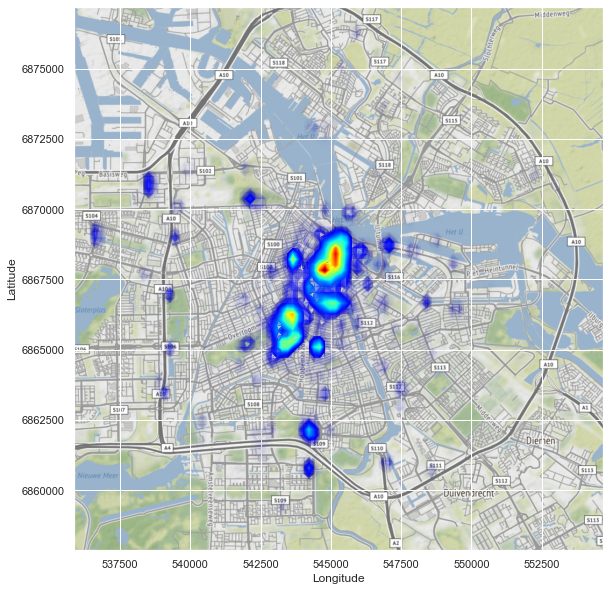

In [67]:
#Map of all years
ax = plot_map(gdf)

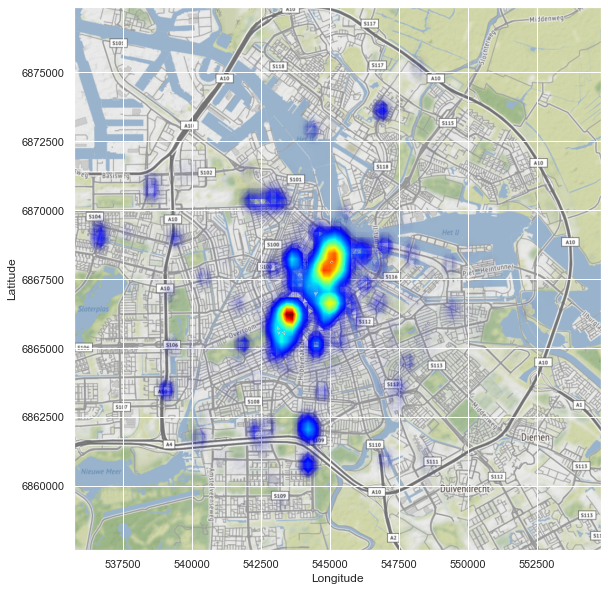

In [68]:
#Map per specific year
ax = plot_map(gdf[gdf.created_at.dt.year == 2012])

### Select only attachments and plot gdf_attachments

In [69]:
gdf['type'].value_counts()

0        437971
photo     65271
Name: type, dtype: int64

In [70]:
gdf_attachment = gdf.loc[gdf['type'] != 0]

In [71]:
gdf_attachment.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 65271 entries, 32 to 2853815
Data columns (total 33 columns):
created_at          65271 non-null datetime64[ns]
id                  65271 non-null int64
id_str              65271 non-null int64
user_id             65271 non-null int64
user_id_str         65271 non-null int64
user_name           65257 non-null object
tweet_text          65271 non-null object
language            57355 non-null object
place               65263 non-null object
longitude           65271 non-null object
latitude            65271 non-null object
sqrt_area           65271 non-null float64
type                65271 non-null object
url                 65271 non-null object
media_url           65271 non-null object
time_stamp          65271 non-null int64
Year                65271 non-null int64
Month               65271 non-null int64
Day                 65271 non-null int64
Hour                65271 non-null int64
DayOfWeek_nr        65271 non-null int64

In [72]:
gdf_attachment['latandlon'].value_counts()

52.355257 4.8764475                      341
52.3741335 4.8968385                     248
52.341213 4.889233                       209
52.378612 4.900546                       187
52.359877000000004 4.885161              179
52.374590500000004 4.881425              174
52.3722755 4.897804                      156
52.357746999999996 4.891587              141
52.37287 4.904542                        138
52.3645335 4.8936044999999995            132
52.375067 4.896185                       131
52.3741334574244 4.896838676260209       118
52.3727645 4.8882265                     109
52.358439000000004 4.8810519999999995    105
52.341590999999994 4.895621               97
52.3620555 4.891963                       93
52.359107 4.883649                        90
52.372869861161 4.90454210109408          88
52.358884 4.882099                        76
52.373018 4.892628                        75
52.3727645713073 4.8882268329218705       74
52.3562185 4.8962165                      73
52.3415911

In [73]:
gdf_attachment['type'].head(5)

32     photo
74     photo
103    photo
328    photo
342    photo
Name: type, dtype: object

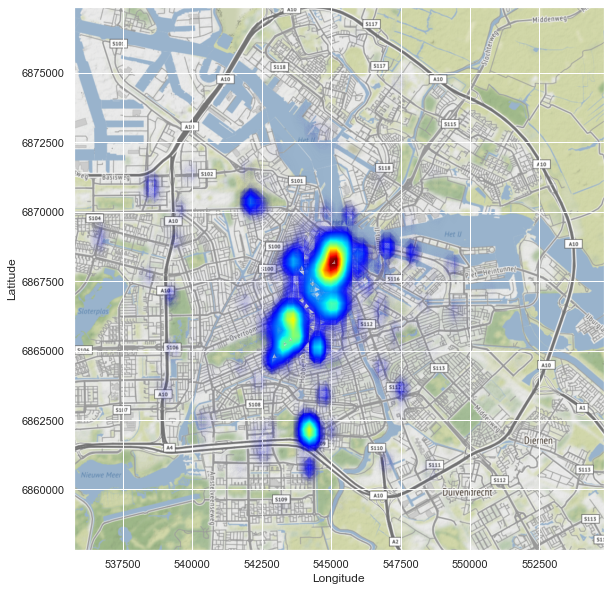

In [74]:
#Map with attachments
plot_map(gdf_attachment)#[gdf_attachment.created_at.dt.year == 2012])